# Matthew Davis Findings 

# Introduction

Our main metric is safety so we tried to prioritize picking submetrics that cater to a wide range of community aspects like housing market and economy, education, public safety and justice, and human/social services. My metric is social service locations in the neighborhoods of Pittsburgh. Originally, I was exploring two alternatives which were summer meal sites, and 211 Emergency Service Requests. Those datasets didn't include the proper subdivision of neighborhoods in the data. Then, I came across BigBurgh Social Service Listings and this had many data sets and the necessary data for properly organizing the neighborhoods and their social services. 

# The Metric: Social Service Places

This safety factor is a prominent component of the collective safety metric because neighborhoods with more social services will logically provide more resources and help to the community. Neighborhoods without those service options is less optimal because the lack of support systems and foundational assistance infrastructure can create a community that suffers from poverty, social instability, and a greater chance of criminal activity in the area. A safe community should include organizations like:
* Food Pantry Services
* Nursing and Medical Centers
* Laundry Locations 
* Libraries 
* Shelters
* Supplies and Clothing Centers
* Financial and Legal Help Centers


### How should we determine the best neighborhood using this metric?
1. To determine the best neighborhood in Pittsburgh, it would make sense to count the frequency of social service locations in each neighborhood and rank them (neighborhood with highest frequency listing is best).
2. An additional supporting evidence indicator is the breadth of type of social service listing. This means that a neighborhood with a wide variety of different social services can accomodate a whole lot more needs of the community then a neighborhood that only has say laundry locations for example.


I am using this dataset: __[BigBurgh Social Services Listings](https://data.wprdc.org/dataset/bigburgh-social-service-listings)__

I am using "Current List of Services" and it is updated monthly.   
    

# The Best Neighborhood

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

ss_data = pd.read_csv('Social_Services_data.csv')

ss_data.head(5)

,_id,service_name,program_or_facility,neighborhood,address,latitude,longitude,organization,category,recommended_for,requirements,phone,narrative,schedule,holiday_exception
0,1,412 Youth Zone,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,roof-daytime,"unaccompanied youth, youth aging out of foster...","must be 16 - 23; and after first visit, become...",412-902-4068,"A safe place Downtown with a leisure space, ki...",Mon - Thurs: 11am - 7pm; Fri: 11am - 5pm; Sa...,NaN
1,2,Dinner & food anytime as needed - 412 Youth Zone,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,meals,"unaccompanied youth, youth aging out of foster...","must be 16 - 23; and after first visit, become...",412-902-4068,"Food available throughout day as needed, Dinne...",Mon - Thurs: 11am - 7pm ; Fri: 11am - 5pm ; ...,NaN
2,3,412 Youth Zone - Physician's Assistant/Registe...,412 Youth Zone,Downtown,"304 Wood St, 6th Floor, PA, 15219",40.438983,-80.001358,Auberle,health,NaN,must be 16 - 23,412-902-4068,"A UPMC physician's assistant, registered nurse...",Mon - Thu: 11am - 4pm,NaN
3,4,Veterans Place,Veterans Place of Washington Blvd,Larimer,"945 Washington Blvd, PA, 15206",40.461178,-79.906674,Veterans Place,roof-daytime|finances,NaN,DD214 or Military ID required for services,412-363-0500,Veterans Place is not just a great place to ha...,Mon - Fri: 8am - 3pm,NaN
4,5,"Meals, Pantry, Laundry - Veterans Place",Veterans Place of Washington Blvd,Larimer,"945 Washington Blvd, PA, 15206",40.461178,-79.906674,Veterans Place,meals|pantries-supplies,Veterans,for Vets only,412-363-0500,Great hangout space with breakfast at 8am - 9a...,Mon - Fri: 8am - 9am breakfast; Mon - Fri: ...,NaN


neighborhood
Downtown          20
Uptown            19
North Side        15
South Side        14
Hill District     11
                  ..
Edgewood           1
Fox Chapel         1
Crafton            1
Castle Shannon     1
WIlkinsburg        1
Name: count, Length: 78, dtype: int64
{'Downtown': 20, 'Uptown': 19, 'North Side': 15, 'South Side': 14, 'Hill District': 11, 'East Liberty': 7, 'North SIde': 5, 'Wilkinsburg': 5, 'Oakland': 5, 'McKeesport': 4, 'Lawrenceville': 4, 'McKees Rocks': 4, 'Homewood': 4, 'Duquesne': 3, 'Monroeville': 3, 'Natrona Heights': 3, 'Braddock': 3, 'Larimer': 3, 'Swissvale': 3, 'Bethel Park': 3, 'Squirrel Hill': 3, 'Sheraden': 3, 'Brookline': 2, 'Northside/Allegheny City Central': 2, 'Baldwin': 2, 'Tarentum': 2, 'Carrick': 2, 'Shadyside': 2, 'Strip District': 2, 'Mt Washington': 1, 'North Point Breeze': 1, 'Northside (East Allegheny)': 1, 'Homestead': 1, 'Sharpsburg': 1, 'Mount Lebanon': 1, 'Mckees Rocks': 1, 'Mckeesport': 1, 'Greenfield': 1, 'Mt Oliver': 1, 'Tu

,Neighborhood,Frequency
0,Downtown,20
1,Uptown,19
2,North Side,15
3,South Side,14
4,Hill District,11
...,...,...
73,Edgewood,1
74,Fox Chapel,1
75,Crafton,1
76,Castle Shannon,1


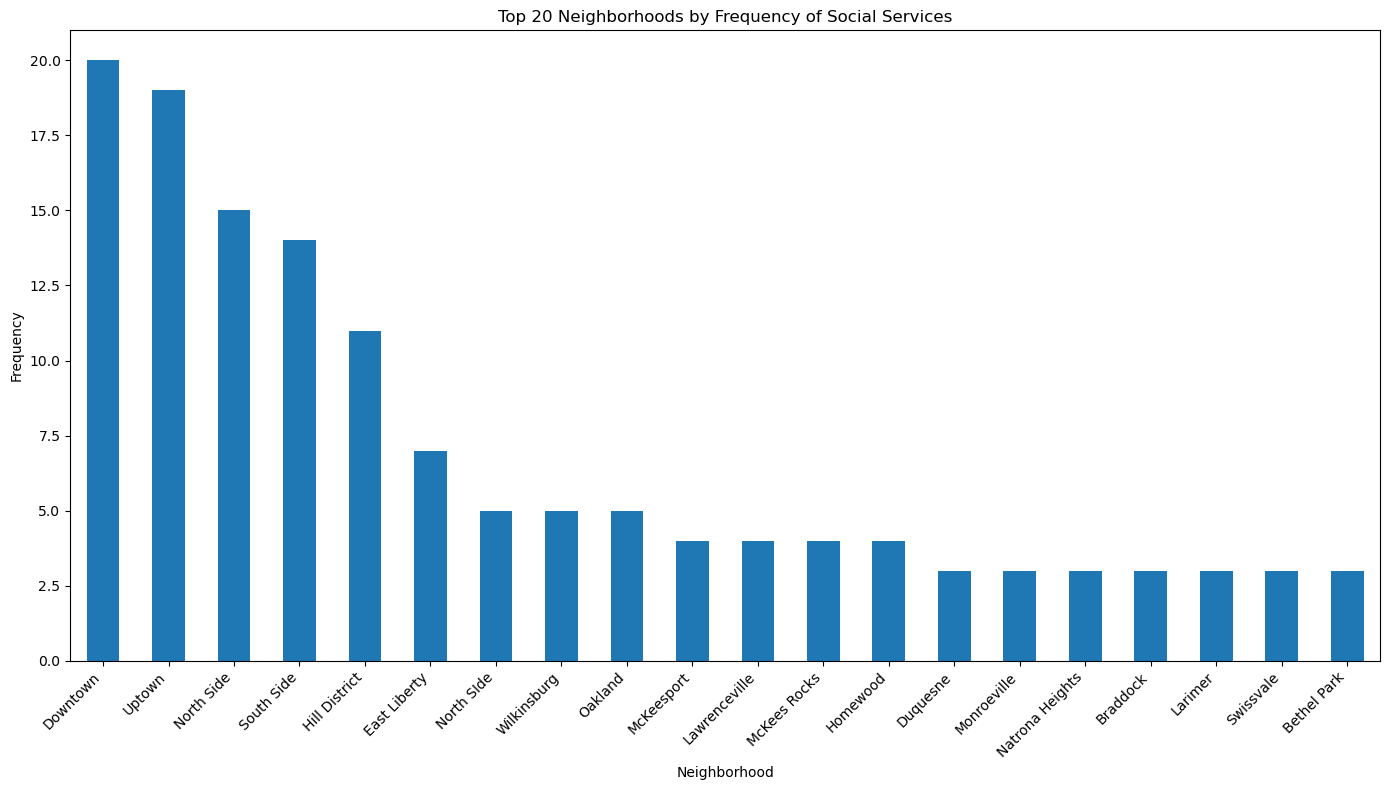

In [21]:
'''Now we need to count the number of times each neighborhood shows up in the data which is directly
associated with how many social services locations are in each neighborhood.
'''

#Store social services counts per neighborhood
neighborhood_counts = ss_data['neighborhood'].value_counts()


#Make dictionary for neighborhoods as keys and frequencies as values
neighborhood_dict = neighborhood_counts.to_dict()
print(neighborhood_dict)


#Table of the dictionary
neighborhood_table = pd.DataFrame({
    'Neighborhood': neighborhood_counts.index,
    'Frequency': neighborhood_counts.values
})

from IPython.display import display
display(neighborhood_table)


#Plot data in histogram for Social Services Frequency in Neighborhoods
plt.figure(figsize=(14, 8))
neighborhood_counts.head(20).plot(kind='bar')  # Display only the top 20 neighborhoods
plt.title('Top 20 Neighborhoods by Frequency of Social Services')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




,neighborhood,Number of Unique Categories
0,Aspinwall,1
1,Avalon,1
2,Baldwin,1
3,Beechview,1
4,Bellevue,1
...,...,...
73,WIlkinsburg,1
74,West End,1
75,Whitehall,1
76,Wilkinsburg,4


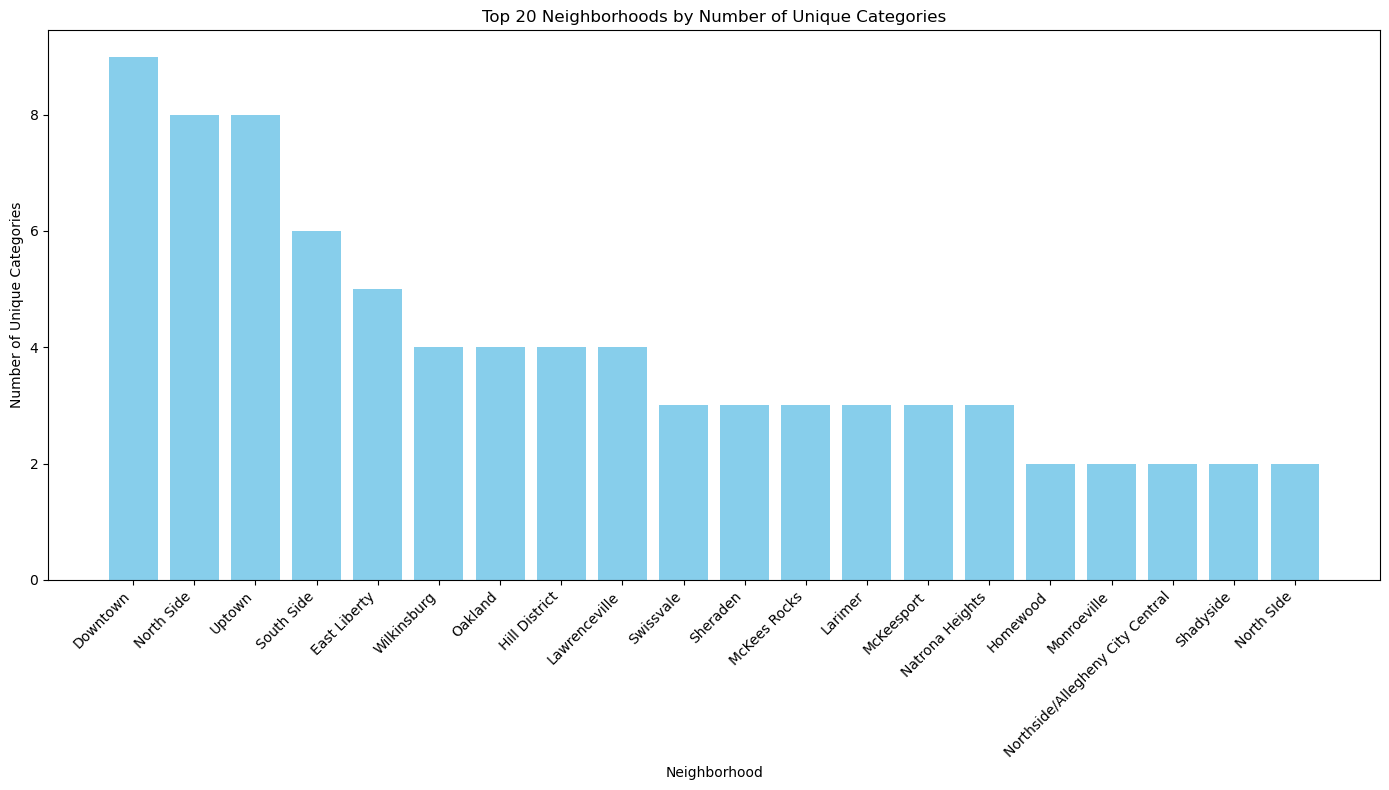

In [32]:
'''
For the additional indicator, we need to group by category and neighborhood and then count the frequency of the 
types of social services
'''

#Holds counts for unique categories of services by neighborhood 
unique_category_counts = ss_data.groupby('neighborhood')['category'].nunique().reset_index(name='Number of Unique Categories')
display(unique_category_counts)

#Plot the unique categories for each neighborhood in histogram style
top_unique_neighborhoods = unique_category_counts.sort_values(by='Number of Unique Categories', ascending=False).head(20)
plt.figure(figsize=(14, 8))
plt.bar(top_unique_neighborhoods['neighborhood'], top_unique_neighborhoods['Number of Unique Categories'], color='skyblue')
plt.title('Top 20 Neighborhoods by Number of Unique Categories')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Unique Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Conclusion

Now that these indicators are established, downtown is concluded to be the best neighborhood for this submetric of social services given that it has the highest freiquency of social services and has the most unique social services.

## Emmanuel Ebo Findings 

# Introduction

Introduction: Introduce the project, and your approach, talk about the process of how you came up with the metric and some alternatives you may have explored.

Our projects serve to answer one question, "What is the safest neighborhood in Pittsburgh?". Our metrics are used to answer this question, we corellated what makes a safe neighborhood to data in the WPRDC, data both . Data such as  t

Metrics

-Text-

In [68]:
import pandas as pd
import numpy as np
import geopandas as gpd
%matplotlib inline
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [20]:
#load the dataset
school_data = pd.read_csv("PittsburghPublicSchoolsData.csv")
#group by zip code and counts the amount repeated
zip_data = school_data.groupby('zip')['address'].count()
#prints unsorted numbers of schools by zip code
zip_data

zip
15201     5
15203     2
15204     3
15205     3
15206    10
15207     4
15208     6
15210     9
15211     1
15212    15
15213     4
15214     2
15216     6
15217     6
15219     6
15220     2
15221     1
15222     2
15224     2
15226     7
15232     1
15233     5
Name: address, dtype: int64

-Text-

In [21]:
#sort by the number of schools in descending order
zip_sorted = zip_data.sort_values(ascending=False)
#prints all
zip_sorted

zip
15212    15
15206    10
15210     9
15226     7
15219     6
15217     6
15208     6
15216     6
15201     5
15233     5
15213     4
15207     4
15205     3
15204     3
15203     2
15220     2
15222     2
15224     2
15214     2
15211     1
15221     1
15232     1
Name: address, dtype: int64

-Text-

In [98]:
#create a geometry column from latitude and longitude
#...
school_data['geometry'] = school_data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

#convert to GeoDataFrame
school_gdf = gpd.GeoDataFrame(school_data, geometry='geometry', crs="EPSG:4326") #...
school_gdf.head()

,sourcedid,name,address,city,state,zip,latitude,longitude,geometry
0,9861,Allderdice Early Headstart,2409 Shady Avenue,Pittsburgh,PA,15217,40.429415,-79.919132,POINT (-79.91913 40.42942)
1,301,Allderdice High School,2409 SHADY AVE,PITTSBURGH,PA,15217,40.429416,-79.919370,POINT (-79.91937 40.42942)
2,204,Allegheny 6-8,810 ARCH ST,PITTSBURGH,PA,15212,40.453231,-80.008655,POINT (-80.00866 40.45323)
3,9863,Allegheny Early Childhood,810 ARCH STREET,Pittsburgh,PA,15212,40.453266,-80.008600,POINT (-80.00860 40.45327)
4,102,Allegheny K-5,810 ARCH ST,PITTSBURGH,PA,15212,40.453181,-80.008895,POINT (-80.00889 40.45318)


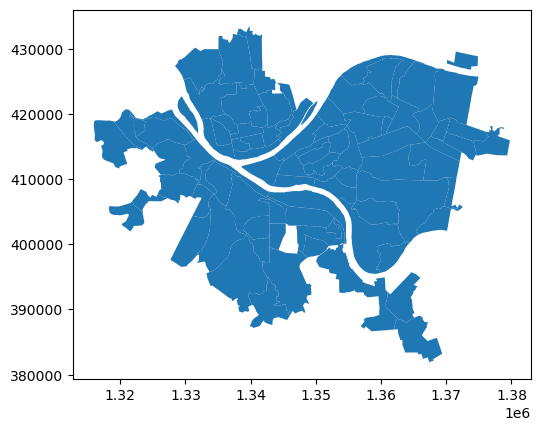

In [76]:
#read in the shapefile
#pitt_neighborhoods = geopandas.read_file(r'C:\Users\Emman\Downloads\Neighborhoods_')
pitt_neighborhoods = gpd.read_file('Neighborhoods_/Neighborhoods_.shp')
#plot the geopandas dataframe
pitt_neighborhoods.plot()
plt.show()


In [94]:
print(gdf.columns)

Index(['OBJECTID', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'perimeter', 'neighbor_', 'neighbor_i', 'hood', 'hood_no',
       'acres', 'sqmiles', 'dpwdiv', 'unique_id', 'sectors', 'shape_le_1',
       'shape_ar_1', 'page_numbe', 'plannerass', 'created_us', 'created_da',
       'last_edite', 'last_edi_1', 'temp', 'pghdb_sde_', 'GlobalID',
       'Shape__Are', 'Shape__Len', 'geometry', 'school_count'],
      dtype='object')


In [87]:
#reproject neighborhoods to match the CRS of school data
pitt_neighborhoods = pitt_neighborhoods.to_crs(school_gdf.crs)
#perform a spatial join to match schools to neighborhoods based on latitude and longitude
school_neighborhoods = gpd.sjoin(school_gdf, pitt_neighborhoods, how='left', predicate='within')
#group by neighborhood and count the number of schools in each neighborhood
neighborhood_school_counts = school_neighborhoods.groupby('hood').size()

#merge the school counts back into the neighborhood GeoDataFrame
pitt_neighborhoods['school_count'] = pitt_neighborhoods['hood'].map(neighborhood_school_counts).fillna(0)



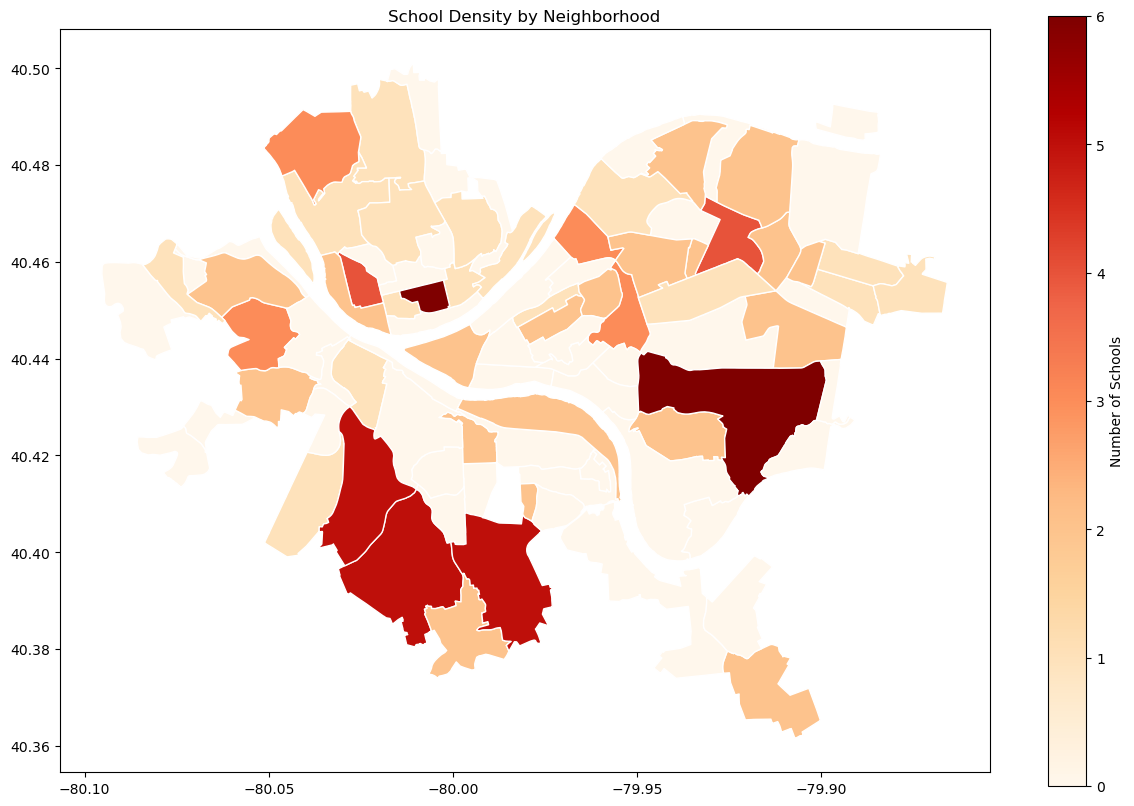

In [82]:
#plot a choropleth map of school counts by neighborhood
pitt_neighborhoods.plot(column='school_count', 
                        cmap='OrRd',              # Choose a color palette
                        edgecolor="white",        # Outline neighborhoods in white
                        legend=True,              # Show the legend
                        legend_kwds={'label': "Number of Schools"}, 
                        figsize=(15, 10),        
                        missing_kwds={"color": "lightgrey"}) #handle neighborhoods with no schools

#title and show the plot
plt.title('School Density by Neighborhood')
plt.show()

In [101]:
#sort neighborhoods by school density
top_neighborhoods = pitt_neighborhoods.sort_values(by='school_count', ascending=False)
#show the top neighborhoods
print(top_neighborhoods[['hood', 'school_count']].head())

                   hood  school_count
45     Allegheny Center           6.0
80  Squirrel Hill South           6.0
51              Carrick           5.0
24            Brookline           5.0
72            Beechview           5.0


# Eric liu Findings 

# Analyzing safety of neighboorhood in Pittsburgh through Arrest Data

## Introduction
Our team's main metric is safety so we picked submetrics like housing market and economy, education, public safety and justice, and human/social services. My metric is safety and justice in the neighborhoods of Pittsburgh. This analysis is flawed in the sense that there is no arrest rate per population. I tried looking for an accurate population dataset but there weren't any. Nor was there any up to date data on the population of many of these neighborhoods on google. 

## The metric: Safety and Justice
This metric is a critical aspect of evaluating neighborhood safety, emphasizing the idea that communities with fewer arrests are typically safer. A low number of arrests may indicate less criminal activity, stronger community ties, and effective preventative measures, such as social programs and education. On the other hand, neighborhoods with higher arrest rates could reflect underlying challenges, such as poverty, social instability, or systemic issues that may contribute to crime.

## Steps I'm taking
* Decrease the amount of data I need to look through.
    * This includes filtering out:
        * Data points before 2021 (We want timely data).
* Create a dictionary in python documenting which neighborhood had how many crimes.
* Create graphs/charts to visually look at the # of crimes in each neighborhood.
* Find top 25 percentile of least arrest neighborhood cities and compare with other submetrics. 

## Step 1 - Creating New CSV with proper data

In [219]:
import pandas as pd
arrests = pd.read_csv("Arrest_data.csv")

# Converts arresttime to string to later filter out any arrests before 2021.
arrests['ARRESTTIME'] = arrests['ARRESTTIME'].astype(str)
query_mask = arrests[arrests['ARRESTTIME'].str[:4].astype(int) >= 2021]

query_mask.to_csv("filtered_arrests.csv", index = False)

In [221]:
query_mask.head(10)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
45715,56724,2033663,20237889,23.0,M,W,2021-01-01T18:55:00,"600 Block 1st AV Pittsburgh, PA 15219",1543 Driving While Operating Privilege is Susp...,"4700 Block Butler ST Pittsburgh, PA 15201",Central Lawrenceville,2,901.0,7.0,2.0,-79.957848,40.474130
45722,56731,2033670,19153578,39.0,F,B,2021-01-01T17:59:00,"2nd AV & W Elizabeth ST Pittsburgh, PA 15207",2701 Simple Assault. / 2709 Harassment (Non-Sp...,"700 Block Johnston AV Pittsburgh, PA 15207",Glen Hazel,4,1504.0,5.0,3.0,-79.933739,40.405610
45724,56733,2033672,19250513,23.0,M,B,2021-01-01T05:21:00,"900 Block Second AV Pittsburgh, PA 15219",9015 Failure To Appear/Arrest on Attachment Order,"200 Block Lamar ST Pittsburgh, PA 15214",Northview Heights,1,2609.0,1.0,1.0,-80.002533,40.473917
45737,56746,2033685,20152523,49.0,M,B,2021-01-01T03:45:00,"900 Block Second AV Pittsburgh, PA 15219","2701(a)(1) Simple Assault - Intent., Know., Re...","3300 Block Hamlet ST Pittsburgh, PA 15213",South Oakland,4,409.0,6.0,3.0,-79.962833,40.435732
45741,56750,2033689,20173108,28.0,M,B,2021-01-01T06:33:00,"1800 Block Belleau ST Pittsburgh, PA 15214",3503.B1I DEF. TRESPASS ACTUAL COMMUNICATION,"1800 Block Belleau ST Pittsburgh, PA 15214",Fineview,1,2509.0,6.0,1.0,-80.006808,40.461905
45774,56797,2033730,20126213,19.0,F,B,2021-01-08T18:53:00,"2500 Block Brownsville RD Pittsburgh, PA 15210",2701 Simple Assault. / 2718(a)(1) Strangulatio...,"2600 Block Brownsville RD Pittsburgh, PA 15227",Carrick,3,2904.0,4.0,3.0,-79.978804,40.385450
45775,56798,2033731,20131277,45.0,F,B,2021-01-08T07:00:00,"900 Block Second AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children.,"3100 Block Shadeland AV Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.031433,40.473338
45776,56799,2033732,20131277,50.0,M,B,2021-01-08T07:00:00,"900 Block Second AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children.,"3100 Block Shadeland AV Pittsburgh, PA 15212",Marshall-Shadeland,1,2715.0,1.0,1.0,-80.031433,40.473338
45777,56800,2033733,20160910,19.0,M,B,2021-01-07T20:40:00,"Halket ST & Louisa ST Pittsburgh, PA 15213",2701 Simple Assault. / 3304 Criminal Mischief.,"3000 Block Vancroft ST Pittsburgh, PA 15219",Upper Hill,2,506.0,6.0,3.0,-79.965157,40.450535
45778,56801,2033734,20199533,32.0,M,B,2021-01-08T05:27:00,"900 Block 2nd AV Pittsburgh, PA 15219",2701 Simple Assault. / 2709 Harassment (Non-Sp...,"10th St BRDG Pittsburgh, PA 15203",South Side Flats,3,1702.0,NaN,NaN,NaN,NaN


## Step 2&3 - Creating a dictionary of # of crimes in each neighborhood & plotting results



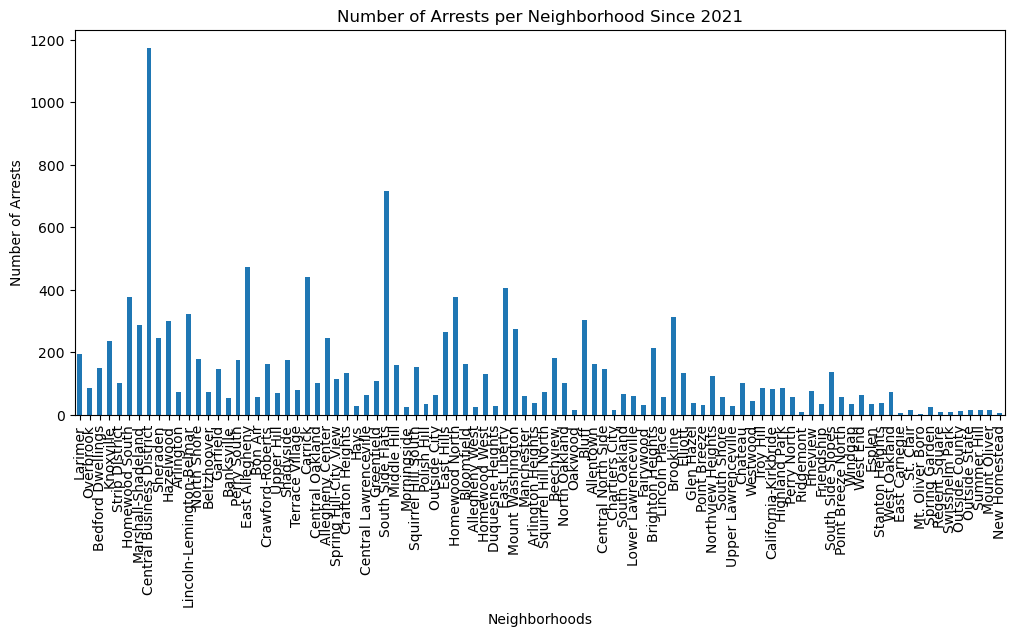

In [110]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

filtered = pd.read_csv("filtered_arrests.csv")
narr = {}
for index, row in filtered.iterrows():
    neighborhood = row["INCIDENTNEIGHBORHOOD"]
    if pd.notna(neighborhood): 
        if neighborhood in narr:
            narr[neighborhood] += 1
        else:
            narr[neighborhood] = 1


# Plotting Arrests per neighborhood
neighborhoodarrests = pd.Series(narr)
neighborhoodarrests.plot(kind='bar', figsize=(12, 5))

plt.title("Number of Arrests per Neighborhood Since 2021")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Arrests")
plt.show()

## Step 4 - Creating Top 10 List of Safest Neighborhoods

In [213]:
df = pd.DataFrame({
    "Name": list(narr.keys()),
    "Count": list(narr.values())
})

from IPython.display import display
display(df)

,Name,Count
0,Larimer,193
1,Overbrook,86
2,Bedford Dwellings,149
3,Knoxville,237
4,Strip District,102
...,...,...
89,Outside County,11
90,Outside State,15
91,Summer Hill,15
92,Mount Oliver,16


In [187]:
#Best neighborhoods are under 33, 25th percentile for safest neighborhoods.
sortedNeighborhoodArrests.Count.describe()

count      94.000000
mean      134.148936
std       164.912551
min         1.000000
25%        33.000000
50%        78.000000
75%       162.000000
max      1173.000000
Name: Count, dtype: float64

In [224]:
sortedNeighborhoodArrests = df.sort_values("Count", ascending=True)
sortedNeighborhoodArrests.head(25)

,Name,Count
85,Mt. Oliver Boro,1
93,New Homestead,4
83,East Carnegie,5
87,Regent Square,9
73,Ridgemont,9
88,Swisshelm Park,10
89,Outside County,11
84,St. Clair,14
50,Oakwood,14
91,Summer Hill,15


## Conclusion
As shown above, we have our top 23 neighborhoods (excluding outside state & outside county). All of these neighborhoods have under 33 arrests in the past 3 years being under the 25th percentile for amount of arrests.  
With the least amount of arrests, Mount Oliver - Borough is the safest neighborhood in Pittsburgh.

# Eraste Boko Findings 

# Introduction

This project aims to analyze a dataset from Pittsburgh's property sales to determine the best neighborhood. This analysis can help individuals and families understand where they might want to move based on property value trends. Typically, neighborhoods with high property values tend to have better amenities, lower crime rates, and overall higher living standards, making them desirable places to live. I used the data set of the [Allegheny County Property Sales Transactions](https://data.wprdc.org/dataset/real-estate-sales/resource/5bbe6c55-bce6-4edb-9d04-68edeb6bf7b1), which is property sales data in the Allegheny county since 2013- Present. Firstly, because the data was very big, it was hard to upload it to Jupyter, and I also wanted it to be relevant, so I filtered the property sales to only contain the sales from 2022 to the present using Excel. 
The metric I chose is the total number of property sales and the median price of properties in a neighborhood, but because I didn't have a neighborhood, I relayed the street address. Neighborhoods with higher property sales activity and higher median prices are often considered better due to their demand and desirability. High sales volume shows the area's popularity, while the median price reflects the typical property value, avoiding the influence of outliers. Together, these metrics help highlight neighborhoods that are both active and valuable.

In [1]:
import pandas as pd 
import numpy as np
import altair as alt

In [2]:
#Read the csv file
propertySales = pd.read_csv("Pittsburgh Property sales data.csv", low_memory = False)
propertySales

,_id,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,...,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
0,37265915,0011J00191000000,1806,,NaN,TUSTIN,ST,NaN,NaN,PITTSBURGH,...,1st Ward - PITTSBURGH,4/28/23,4/28/23,44100.0,TR24,000002,GV,GOVERNMENT SALE,TS,TREASURER DEED
1,37265916,0011J00246000000,1903,,NaN,BLVD OF THE ALLIES,NaN,NaN,NaN,PITTSBURGH,...,1st Ward - PITTSBURGH,4/28/23,4/28/23,1719.0,TR24,000003,GV,GOVERNMENT SALE,TS,TREASURER DEED
2,37265919,0120N00032000000,5431,,NaN,KEYSTONE,ST,NaN,NaN,PITTSBURGH,...,10th Ward - PITTSBURGH,6/20/22,5/31/22,1.0,18940,308,99,CORRECTIVE DEED / DUPLICATE SALE,CO,CORRECTIVE DEED
3,37265921,0124D00020000000,6419,,NaN,OLIVANT,ST,NaN,NaN,PITTSBURGH,...,12th Ward - PITTSBURGH,12/18/23,12/16/23,26500.0,19525,267,99,CORRECTIVE DEED / DUPLICATE SALE,CO,CORRECTIVE DEED
4,37265922,0124H00184000000,1300,-1320,NaN,PAULSON,AVE,NaN,NaN,PITTSBURGH,...,12th Ward - PITTSBURGH,1/18/22,1/8/22,0.0,18759,122,GV,GOVERNMENT SALE,CO,CORRECTIVE DEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47260,37711717,0295S00094000100,10143,,NaN,FRANKSTOWN,RD,NaN,NaN,PITTSBURGH,...,Penn Hills,3/15/23,3/14/23,40000.0,19236,179,H,MULTI-PARCEL SALE,DE,DEED
47261,37711718,0015B00147000000,208,,NaN,JASPER,ST,NaN,NaN,PITTSBURGH,...,19th Ward - PITTSBURGH,3/10/23,2/28/23,0.0,19231,583,H,MULTI-PARCEL SALE,SW,SPECIAL WARRANTY
47262,37711720,0176L00210000000,307,,NaN,BARNES,ST,NaN,NaN,PITTSBURGH,...,Wilkinsburg,3/14/23,3/6/23,295000.0,19235,372,0,VALID SALE,FD,FIDUCIARY DEED
47263,37711721,0472R00093000000,466,,NaN,TEMONA,DR,NaN,NaN,PITTSBURGH,...,Pleasant Hills,3/16/23,3/15/23,126000.0,19236,561,1,SHERIFF SALE,SD,SHERIFF DEED


In [3]:
#get the general idea of the dataset structure
propertySales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47265 entries, 0 to 47264
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      47265 non-null  int64  
 1   PARID                    47265 non-null  object 
 2   PROPERTYHOUSENUM         47265 non-null  int64  
 3   PROPERTYFRACTION         47265 non-null  object 
 4   PROPERTYADDRESSDIR       2399 non-null   object 
 5   PROPERTYADDRESSSTREET    47264 non-null  object 
 6   PROPERTYADDRESSSUF       47188 non-null  object 
 7   PROPERTYADDRESSUNITDESC  1963 non-null   object 
 8   PROPERTYUNITNO           1949 non-null   object 
 9   PROPERTYCITY             47265 non-null  object 
 10  PROPERTYSTATE            47265 non-null  object 
 11  PROPERTYZIP              47265 non-null  int64  
 12  SCHOOLCODE               47265 non-null  int64  
 13  SCHOOLDESC               47265 non-null  object 
 14  MUNICODE              

In [4]:
# Drop the missing values rows
propertySales = propertySales.dropna(subset=['PRICE', 'PROPERTYADDRESSSTREET'])
propertySales

,_id,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESSDIR,PROPERTYADDRESSSTREET,PROPERTYADDRESSSUF,PROPERTYADDRESSUNITDESC,PROPERTYUNITNO,PROPERTYCITY,...,MUNIDESC,RECORDDATE,SALEDATE,PRICE,DEEDBOOK,DEEDPAGE,SALECODE,SALEDESC,INSTRTYP,INSTRTYPDESC
0,37265915,0011J00191000000,1806,,NaN,TUSTIN,ST,NaN,NaN,PITTSBURGH,...,1st Ward - PITTSBURGH,4/28/23,4/28/23,44100.0,TR24,000002,GV,GOVERNMENT SALE,TS,TREASURER DEED
1,37265916,0011J00246000000,1903,,NaN,BLVD OF THE ALLIES,NaN,NaN,NaN,PITTSBURGH,...,1st Ward - PITTSBURGH,4/28/23,4/28/23,1719.0,TR24,000003,GV,GOVERNMENT SALE,TS,TREASURER DEED
2,37265919,0120N00032000000,5431,,NaN,KEYSTONE,ST,NaN,NaN,PITTSBURGH,...,10th Ward - PITTSBURGH,6/20/22,5/31/22,1.0,18940,308,99,CORRECTIVE DEED / DUPLICATE SALE,CO,CORRECTIVE DEED
3,37265921,0124D00020000000,6419,,NaN,OLIVANT,ST,NaN,NaN,PITTSBURGH,...,12th Ward - PITTSBURGH,12/18/23,12/16/23,26500.0,19525,267,99,CORRECTIVE DEED / DUPLICATE SALE,CO,CORRECTIVE DEED
4,37265922,0124H00184000000,1300,-1320,NaN,PAULSON,AVE,NaN,NaN,PITTSBURGH,...,12th Ward - PITTSBURGH,1/18/22,1/8/22,0.0,18759,122,GV,GOVERNMENT SALE,CO,CORRECTIVE DEED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47260,37711717,0295S00094000100,10143,,NaN,FRANKSTOWN,RD,NaN,NaN,PITTSBURGH,...,Penn Hills,3/15/23,3/14/23,40000.0,19236,179,H,MULTI-PARCEL SALE,DE,DEED
47261,37711718,0015B00147000000,208,,NaN,JASPER,ST,NaN,NaN,PITTSBURGH,...,19th Ward - PITTSBURGH,3/10/23,2/28/23,0.0,19231,583,H,MULTI-PARCEL SALE,SW,SPECIAL WARRANTY
47262,37711720,0176L00210000000,307,,NaN,BARNES,ST,NaN,NaN,PITTSBURGH,...,Wilkinsburg,3/14/23,3/6/23,295000.0,19235,372,0,VALID SALE,FD,FIDUCIARY DEED
47263,37711721,0472R00093000000,466,,NaN,TEMONA,DR,NaN,NaN,PITTSBURGH,...,Pleasant Hills,3/16/23,3/15/23,126000.0,19236,561,1,SHERIFF SALE,SD,SHERIFF DEED


In [5]:
#perform some statistical analysis on the price, mean, median and total value of Sales per neighborhood and aggregate the values
propertySalesPriceStatistics=propertySales.groupby(['PROPERTYADDRESSSTREET']).agg(TotalSales=('PRICE', 'count'), AveragePrice=('PRICE', 'mean'), MedianPrice=('PRICE', 'median')).reset_index()
propertySalesPriceStatistics

,PROPERTYADDRESSSTREET,TotalSales,AveragePrice,MedianPrice
0,0 OHIO RIVER BLVD,1,398750.000000,398750.0
1,10TH,13,164154.615385,130000.0
2,11TH,17,171640.294118,135100.0
3,12TH,7,98000.285714,72000.0
4,13TH,16,214281.500000,206250.0
...,...,...,...,...
4918,ZESTA,1,1.000000,1.0
4919,ZIMMERMAN,7,69000.428571,40000.0
4920,ZUG,1,1.000000,1.0
4921,ZUPANCIC,9,224513.333333,275000.0


In [6]:
#sort the value of dataset of Houses with the highest Average prices in descending order
propertySalesPriceStatistics=propertySalesPriceStatistics.sort_values("AveragePrice", ascending=False)
propertySalesPriceStatistics

,PROPERTYADDRESSSTREET,TotalSales,AveragePrice,MedianPrice
3626,QUINN,1,3.250000e+07,32500000.0
455,BETA,1,2.350000e+07,23500000.0
3464,PENN HILLS,4,2.050000e+07,20500000.0
4232,STONER,1,1.796000e+07,17960000.0
1527,FEDERAL,18,9.377817e+06,189500.0
...,...,...,...,...
570,BRENTRIDGE,1,0.000000e+00,0.0
2009,HEDGE,1,0.000000e+00,0.0
2891,MCILRATH,1,0.000000e+00,0.0
941,CLOVERVIEW,4,0.000000e+00,0.0


In [7]:
# Create a Bar plot
barPlot = alt.Chart(propertySalesPriceStatistics.head(20), title='Average Prices of Houses Sales per Street Address in Pittsburgh').mark_bar().encode(
    x=alt.X("AveragePrice:Q").title('Average Price of houses Sales from 2022-2024'),
    y=alt.Y("PROPERTYADDRESSSTREET:N").title('Street Address in Pittsburgh'),
    color=alt.Color('PROPERTYADDRESSSTREET:N',title='Street Address' ),
    tooltip=['AveragePrice', 'PROPERTYADDRESSSTREET', 'TotalSales'],
).properties(
    title= "Top 20 Street Address with the highest Average Sales Price",
    width=600,
    height= 400
)

barPlot

alt.Chart(...)

Now I have noticed that there are a lot of outliers in the data. Some houses have only one total Sales, but their prices are so expensive that performing any analysis will result in the data being skewed. So I need to do some data Wrangling and clean the dataset, but before that, I need to make sure that my initial doubts were founded. 

In [8]:
#Describe the column TotalSales
propertySalesPriceStatistics.TotalSales.describe()

count    4923.000000
mean        9.585415
std        14.984909
min         1.000000
25%         2.000000
50%         5.000000
75%        11.000000
max       267.000000
Name: TotalSales, dtype: float64

In [9]:
#Get the number of houses that have a Sale less than 11
countOfSales=(propertySalesPriceStatistics.TotalSales < 11).sum
countOfSales


<bound method Series.sum of 3626     True
455      True
3464     True
4232     True
1527    False
        ...  
570      True
2009     True
2891     True
941      True
4894     True
Name: TotalSales, Length: 4923, dtype: bool>

In [10]:
streetAddressSales=propertySales.groupby(['PROPERTYADDRESSSTREET']).agg(TotalSales=('PRICE', 'count')).reset_index()
streetAddressSales=streetAddressSales.sort_values("TotalSales", ascending=False)
streetAddressSales

,PROPERTYADDRESSSTREET,TotalSales
3461,PENN,267
50,5TH,228
4653,WASHINGTON,227
666,BUTLER,223
631,BROWNSVILLE,196
...,...,...
519,BONEL,1
2270,JOHNSON,1
2262,JEWEL,1
4008,SETON,1


In [11]:

propertySalesPriceStatistics
#create a heatmap
alt.Chart(streetAddressSales.head(20), title="Street Address").mark_rect().encode(
    x=alt.X("PROPERTYADDRESSSTREET:N", title="Street Address"),
    y=alt.Y("TotalSales:Q", title="Count of sales in $ per Street Address"),
    color=alt.Color('TotalSales:Q',title='Total Sales' ),
    tooltip=['PROPERTYADDRESSSTREET', 'TotalSales'],
).properties(
    title= "HeatMap of 20 Street Address in Pittsburgh with highest count",
    width=800,
    height= 400
)

alt.Chart(...)

Here, from the heatmap, we can see that the top streets have more than 100 house Sales; from the TotalValue description, the mean shows an average of 9.6 Sales per street, and the median shows five house sales per street. The top streets have at least 11 house sales per street, confirming my previous assumption that most streets have a few sales and most of them are below the mean according to the count of `streetAddressSales`that is less than 11 sales being 3600 on 4923 initial rows. Moreover, the median being five compared to the mean means that our dataset is right-skewed

In [12]:
#Sort the values of the Houses with the most sales in descending order
propertySalesPriceStatistics=propertySalesPriceStatistics.sort_values("TotalSales", ascending=False)
propertySalesPriceStatistics.head(20)

,PROPERTYADDRESSSTREET,TotalSales,AveragePrice,MedianPrice
3461,PENN,267,492337.711610,285000.0
50,5TH,228,444541.333333,242500.0
4653,WASHINGTON,227,447670.612335,180000.0
666,BUTLER,223,422913.085202,180000.0
631,BROWNSVILLE,196,177105.596939,110000.0
2064,HIGHLAND,166,229978.993976,193000.0
3210,NORTH,144,179094.347222,50250.0
4198,STANTON,136,182341.507353,122500.0
3491,PERRYSVILLE,130,134468.253846,70000.0
3331,ORCHARD,121,142437.702479,90000.0


In [13]:
# Describe the column Average price
propertySalesPriceStatistics.AveragePrice.describe()

count    4.923000e+03
mean     2.495910e+05
std      7.950097e+05
min      0.000000e+00
25%      8.248441e+04
50%      1.556752e+05
75%      2.581401e+05
max      3.250000e+07
Name: AveragePrice, dtype: float64

Now that I know the data is skewed, I will filter the data using only the top-selling houses and the houses worth `$249,591`. Houses in the upper bound,75 percentile, were chosen for this filter because a high Sales count means the neighborhood is good and attracts many people. Also, houses equal to or worth more than the mean, `$249,591`, are great indicators that the street address is one of the best around, possibly with great amenities and a prestigious neighborhood. 

In [14]:

meanAveragePrice= 2.495910e+05
#Filter the data by selecting only the houses in the Q3 and houses that their Sales price were equal or more than the mean of the Average Price of the houses Sales in Pittsburgh 
streetWithHighSalesCounts=propertySalesPriceStatistics[(propertySalesPriceStatistics.TotalSales >11) & (propertySalesPriceStatistics.AveragePrice >= meanAveragePrice)] 
#sort the result in ascending order
streetWithHighSalesCounts=streetWithHighSalesCounts.sort_values("AveragePrice", ascending=False)

In [15]:
# Create a Bar Plot
barPlot = alt.Chart(streetWithHighSalesCounts.head(10), title='Total Sales count of per Property Street Address in Pittsburgh').mark_bar().encode(
    x=alt.X("AveragePrice:Q").title('Total Average Sales price of houses from 2022-2024'),
    y=alt.Y("PROPERTYADDRESSSTREET:N").title('Street Address in Pittsburgh'),
    color=alt.Color('PROPERTYADDRESSSTREET:N',title='Street Address' ),
    tooltip=['AveragePrice', 'PROPERTYADDRESSSTREET', 'TotalSales'],
).properties(
    title= "Top 10 Street Address with the highest Average price of properties from 2022-2024",
    width=600,
    height= 400
)

barPlot

alt.Chart(...)

### Finally, after cleaning the data, these are the Street addresses with the highest average price of house sales:

In [16]:
streetWithHighSalesCounts.head(10).reset_index()

,index,PROPERTYADDRESSSTREET,TotalSales,AveragePrice,MedianPrice
0,1527,FEDERAL,18,9.377817e+06,189500.0
1,3783,RODI,26,6.656691e+06,311500.0
2,13,21ST,15,3.931667e+06,458000.0
3,3598,PROGRESS,21,3.836105e+06,5205400.0
4,752,CARPENTER,15,3.193753e+06,5205400.0
5,708,CAMP HORNE,14,2.679250e+06,169250.0
6,1133,DANA,32,1.935063e+06,446186.0
7,713,CANAL,37,1.519061e+06,160000.0
8,874,CHESTNUT,43,1.516548e+06,95000.0
9,3316,OLIVIA,68,1.244566e+06,399500.0


From my analysis this are the top Street Address Neighborhood with the highest average Prices: 

1-FEDERAL: Northside

 2-RODI: Penn Hills
 
3-21ST: South Side Flats

 4-PROGRESS : East Allegheny
 
5-CARPENTER Way: Northside

 6-CAMP HORNE: Kilbuck 
 
7-DANA : Chartiers

8-CANAL : Strip District

9-CHESTNUT: Northside

10-OLIVIA: Mckee Rocks


## Conclusion
Based on my research and analysis of property sales data in Pittsburgh, Northside emerges as the best neighborhood overall. The analysis shows Federal Street, located in Northside, as having the highest average property price at `$9,377,817` alongside significant sales activity, with 18 transactions, making it one of the most desirable locations in the city. Other nearby streets, such as Chestnut, with 43 sales and an average price of `$1,516,548`, and Carpenter Way, with an average price of `$3,193,753`, also feature prominently in the analysis, further solidifying Northside's reputation as a high-demand and premium area. To arrive at this conclusion, I analyzed property sales data from 2022 to now, focusing on two key metrics: the total sales and the average and median prices of the properties. Streets with more property transactions were prioritized, suggesting stronger demand and activity.
Additionally, average and median property prices were used to gauge value, with median prices offering a more accurate reflection by being less affected by outliers. Streets with sales counts above 11 and average prices above the mean `$249,591` were given further attention to ensure a focus on active and high-value areas. Unlike other neighborhoods, Northside consistently ranked highly in sales activity and property values, showcasing a strong and active real estate market. While other streets like Rodi Street in neighborhoods like Penn Hills and 21st Street in South Side Flats also exhibit high property values and activity, Northside stands out with its consistent pattern of high demand and price stability. 

# Final Group Pick for the Best Neighborhood
Our main focus was safety, so we looked at different factors like housing, schools, public safety, and social services to find the best neighborhood. After comparing all our results, we picked Northside as the best neighborhood. We chose Northside because it showed up in every dataset we analyzed and performed well in all the key areas. Northside has the second-highest number of social service places (after Downtown), making it a great community for support and resources. It also has the highest property values and the most sales, showing that it’s a strong and active housing market. When it comes to schools, Northside has the most public schools compared to other neighborhoods, which is a big plus for families. On top of that, Northside has one of the lowest arrest counts and falls in the bottom 25% for arrests across the city, making it one of the safest neighborhoods based on our data. Because Northside stands out in safety, housing, education, and community resources, we believe it’s the best all-around neighborhood in Pittsburgh.